In [48]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [49]:
iris=load_iris()
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [50]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
df["target"]=iris.target
df["target_name"]=df["target"].apply(lambda i:iris.target_names[i])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## we now only use petal length and petal width

In [52]:
df.drop(columns=["sepal length (cm)","sepal width (cm)"],inplace=True)

In [53]:
df1=df[df["target"]==0]
df2=df[df["target"]==1]
df3=df[df["target"]==2]

[]

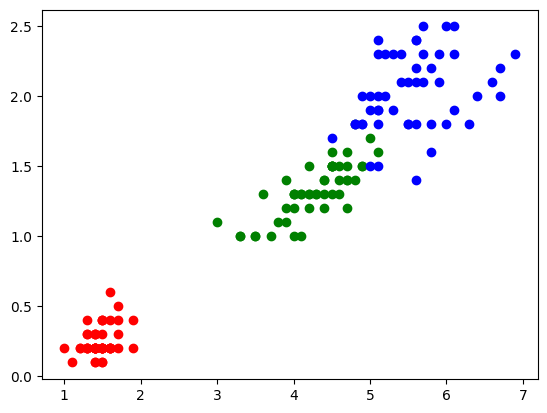

In [54]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],c="red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],c="green")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],c="blue")
plt.plot()

In [55]:
model=KMeans(n_clusters=3)
y_pred=model.fit_predict(df[["petal length (cm)","petal width (cm)"]])
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
df["pred"]=y_pred

In [57]:
df.head()

,petal length (cm),petal width (cm),target,target_name,pred
0,1.4,0.2,0,setosa,2
1,1.4,0.2,0,setosa,2
2,1.3,0.2,0,setosa,2
3,1.5,0.2,0,setosa,2
4,1.4,0.2,0,setosa,2


[]

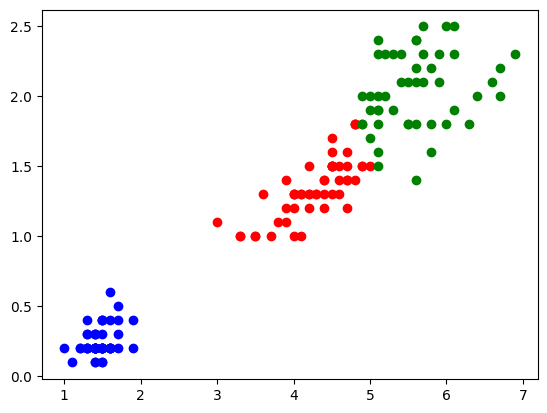

In [58]:
df1=df[df["pred"]==0]
df2=df[df["pred"]==1]
df3=df[df["pred"]==2]
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],c="red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],c="green")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],c="blue")
plt.plot()

### do some noralization

In [59]:
df.head()

,petal length (cm),petal width (cm),target,target_name,pred
0,1.4,0.2,0,setosa,2
1,1.4,0.2,0,setosa,2
2,1.3,0.2,0,setosa,2
3,1.5,0.2,0,setosa,2
4,1.4,0.2,0,setosa,2


In [67]:
error=[500]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    y_pred=model.fit(df[["petal length (cm)","petal width (cm)"]])
    error.append(model.inertia_)
error

[500,
 550.8953333333334,
 86.39021984551397,
 31.412885668276978,
 19.490300869467028,
 14.70111201079622,
 11.087223662604787,
 10.128911853311232,
 8.338830468311246,
 6.576538396386223]

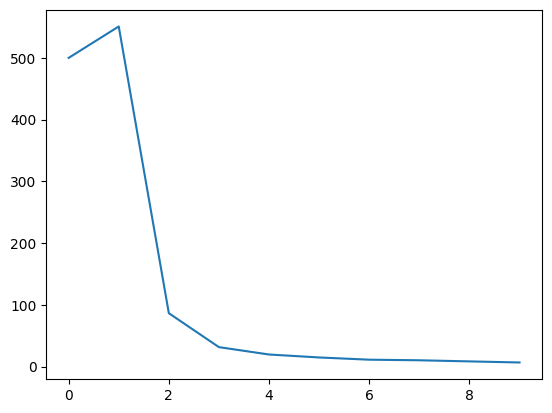

In [68]:
plt.plot(error)